# House Price Prediction

In [44]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [51]:
# Load the dataset
HouseDF = pd.read_csv('USA_Housing.csv')


In [52]:
# Display the shape of the DataFrame
print(HouseDF.shape)

(5000, 7)


In [53]:
# Display the first few rows of the DataFrame
HouseDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,NaN,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [74]:
HouseDF.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             6
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         5
dtype: int64

In [54]:
# Display information about the DataFrame
print(HouseDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           4994 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       4995 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [56]:
# Display summary statistics of the DataFrame
HouseDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,4994.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977509,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991637,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322274,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.971563,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650932,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [57]:
HouseDF.columns# Get the column names
print(HouseDF.columns)



Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


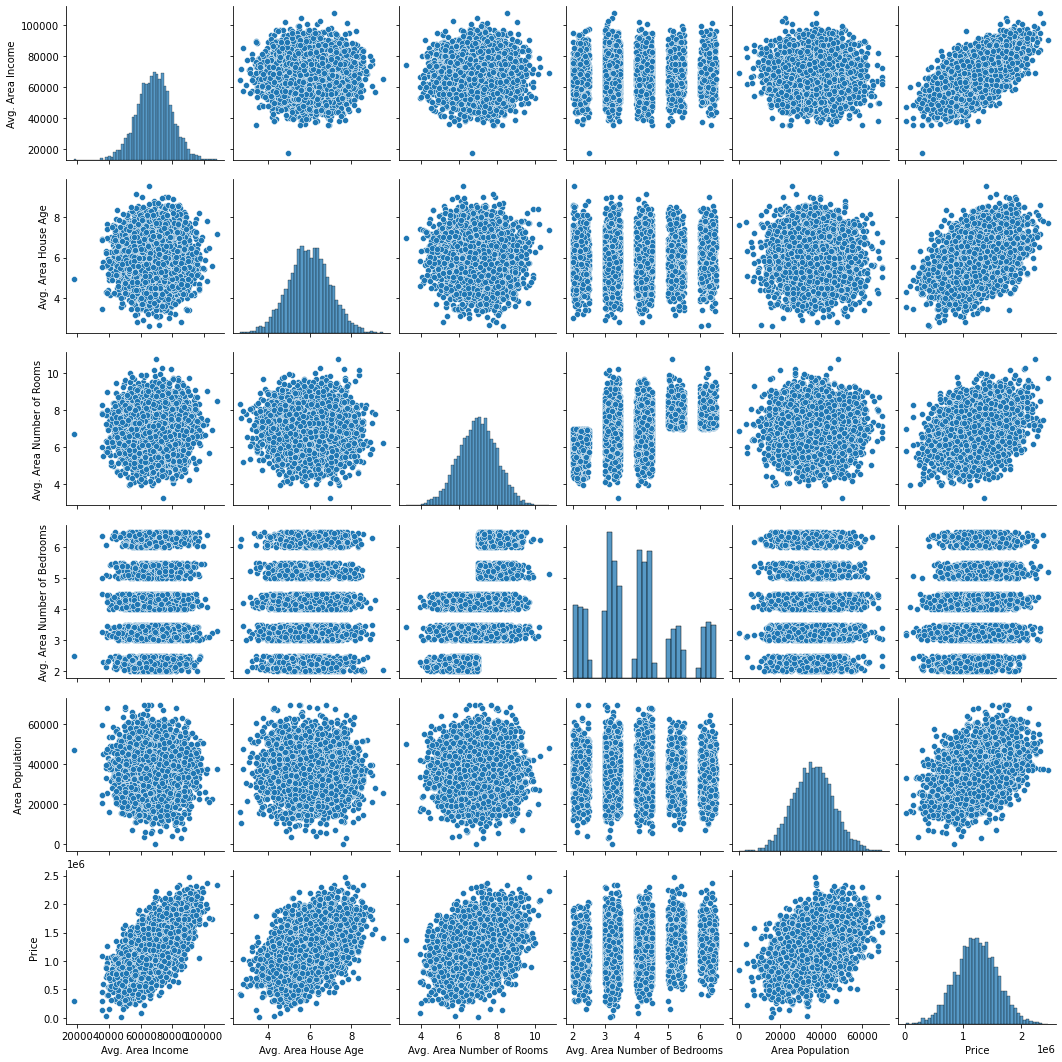

In [58]:
# Create a pairplot
sns.pairplot(HouseDF)


<AxesSubplot:>

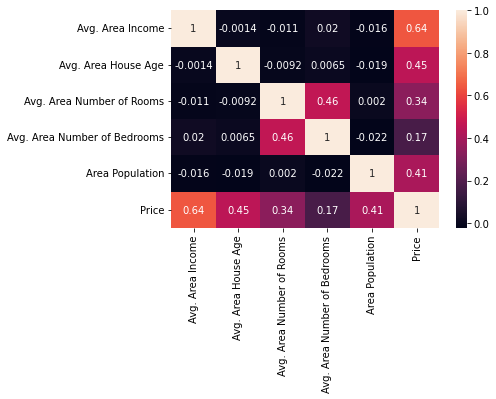

In [59]:

# Create a heatmap of correlations
sns.heatmap(HouseDF.corr(), annot=True)

In [84]:
# Define the features (X) and target variable (y)
X = HouseDF[['Avg. Area Income','Avg. Area Number of Rooms',
             'Avg. Area Number of Bedrooms', 'Area Population']]
y = HouseDF['Price']

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [86]:
# Create a linear regression model
model = LinearRegression()

In [87]:
X_train

,Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1303,68091.17968,7.502956,3.10,44557.37966
1051,75729.76555,7.642973,4.21,29996.01845
4904,70885.42082,7.250241,5.42,38627.30147
931,73386.40734,7.915453,4.30,38413.49048
4976,75046.31379,7.797825,5.23,34107.88862
...,...,...,...,...
4171,56610.64256,7.558137,3.29,25494.74030
599,70596.85095,6.539986,3.10,51614.83014
1361,55621.89910,6.868291,2.30,63184.61315
1547,63044.46010,5.913454,4.10,32725.27954


In [88]:

# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [91]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

In [92]:
coeff_df

,Coefficient
Avg. Area Income,21.575806
Avg. Area Number of Rooms,118422.203812
Avg. Area Number of Bedrooms,6368.636184
Area Population,15.037329


In [93]:
predictions = model.predict(X_test)

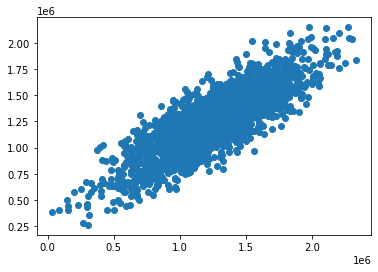

In [94]:
plt.scatter(y_test, predictions)

C:\Users\Prem Prakash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

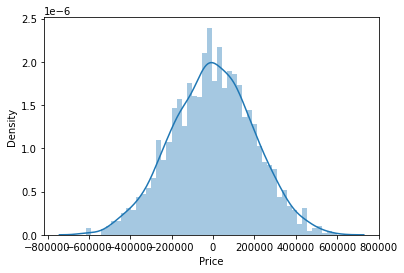

In [98]:
sns.distplot((y_test-predictions),bins=50)